第0   次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 1 0], 其适应度(找到的函数最大值)是: 1.414112
第100 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第200 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 0 1 1 0], 其适应度(找到的函数最大值)是: 1.403816
第300 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 1], 其适应度(找到的函数最大值)是: 1.413121
第400 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 1 0 0], 其适应度(找到的函数最大值)是: 1.412923
第500 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第600 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 1 1], 其适应度(找到的函数最大值)是: 1.414046
第700 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第800 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 0 1 1 0], 其适应度(找到的函数最大值)是: 1.403816
第900 次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 0 0 0], 其适应度(找到的函数最大值)是: 1.411074
第1000次进化后, 基因(fitness_score)最好的个体是: [1 0 0 0 1 1 0 0], 其适应度(找到的函数最大值)是: 1.412923
第1100次进化后, 基因(fitness_score)最好的个体是: [1 0 0 1 0 0 0 0], 其适应度(找到的函数最大值)是: 1.397886
第1200次进化后, 基因(fitness_score)

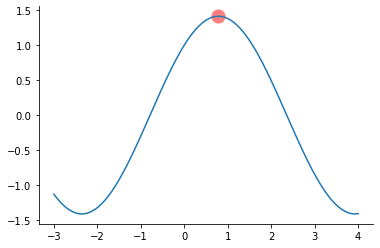

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 找到函数f(x)在区间self.x_bounder上的最大值
def f(x):
    return np.sin(x) + np.cos(x)


class GeneticAlgorithm(object):
    """遗传算法.

    Parameters:
    -----------
    cross_rate: float
        交配的可能性大小.
    mutate_rate: float
        基因突变的可能性大小. 
    n_population: int
        种群的大小.
    n_iterations: int
        迭代次数.
    DNA_size: int
        DNA的长度.
    x_bounder: list
        x 轴的区间, 用遗传算法寻找x在该区间中的最大值.
    """
    def __init__(self, cross_rate, mutation_rate, n_population, n_iterations, DNA_size):
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.n_population = n_population
        self.n_iterations = n_iterations
        self.DNA_size = 8                            # DNA的长度
        self.x_bounder = [-3, 4]


    # 初始化一个种群
    def init_population(self):
        population = np.random.randint(low=0, high=2, size=(self.n_population, self.DNA_size)).astype(np.int8)
        return population

    # 将种群中的每个个体的DNA由二进制转换成十进制
    def transformDNA(self, population):
        population_decimal = ( (population.dot(np.power(2, np.arange(self.DNA_size)[::-1])) / np.power(2, self.DNA_size) - 0.5) * 
                               (self.x_bounder[1] - self.x_bounder[0]) + 0.5 * (self.x_bounder[0] + self.x_bounder[1])  )
        return population_decimal

    # 计算种群中每个个体的适应度，适应度越高，说明该个体的基因越好
    def fitness(self, population):
        transform_population = self.transformDNA(population)
        fitness_score = f(transform_population)
        return fitness_score - fitness_score.min()  # 在select函数中按照个体的适应度进行抽样的的时候，抽样概率值必须是非负的

    # 对种群按照其适应度进行采样，这样适应度高的个体就会以更高的概率被选择
    def select(self, population, fitness_score):
        fitness_score = fitness_score + 1e-4     # 下一步抽样的过程中用到了除法，出现除法就要考虑到分母为0的特殊情况
        idx = np.random.choice(np.arange(self.n_population), size=self.n_population, replace=True, p=fitness_score/fitness_score.sum())
        return population[idx]

    # 进行交配
    def create_child(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            index = np.random.randint(0, self.n_population, size=1)
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)
            parent[cross_points] = pop[index, cross_points]
        return parent

    # 基因突变
    def mutate_child(self, child):
        for i in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                child[i] = 1
            else:
                child[i] = 0
        return child

    # 进化
    def evolution(self):
        population = self.init_population()
        for i in range(self.n_iterations):
            fitness_score = self.fitness(population)
            best_person = population[np.argmax(fitness_score)]

            if i%100 == 0:
                print(u'第%-4d次进化后, 基因(fitness_score)最好的个体是: %s, 其适应度(找到的函数最大值)是: %f' % (i, best_person, 
                                                                                f(self.transformDNA(best_person)) ) )

            population = self.select(population, fitness_score)
            population_copy = population.copy()

            for parent in population:
                child = self.create_child(parent, population_copy)
                child = self.mutate_child(child)
                parent[:] = child

            population = population

        self.best_person = best_person

def main():
    ga = GeneticAlgorithm(cross_rate=0.9, mutation_rate=0.1, n_population=300, n_iterations=2000, DNA_size=8)
    ga.evolution()

    # 绘图
    x = np.linspace(start=ga.x_bounder[0], stop=ga.x_bounder[1], num=200)
    plt.plot(x, f(x))
    plt.scatter(ga.transformDNA(ga.best_person), f(ga.transformDNA(ga.best_person)), s=200, lw=0, c='red', alpha=0.5)
    ax = plt.gca()

    ax.spines['right'].set_color('none')  # 去掉右侧的轴
    ax.spines['top'].set_color('none')    # 去掉上方的轴

    ax.xaxis.set_ticks_position('bottom') # 设置x轴的刻度仅在下方显示
    ax.yaxis.set_ticks_position('left')   # 设置y轴的刻度仅在左边显示
    plt.show()

if __name__ == '__main__':
    main()